<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Regression with Neural Networks and TensorFlow Lab


---

In the lesson you have seen how to solve a classification problem with a neural network, and you have seen how to do linear regression with TensorFlow in the least squares way.

Combine what you have learned to construct a neural network for regression problems. 

- To do so, you will have to modify the cost function and the output layer. 

- Split your data in a train and a test set and report the final MSE on the test set.

- Test different network structures with varying numbers of neurons and layers.

- Adjust your code so that you will only have to specify the number of neurons and layers. You will have to adjust weight and bias dictionaries and the multilayer perceptron function for that.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4)
plt.style.use('ggplot')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

In [2]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [3]:
from sklearn.datasets import load_boston

boston = load_boston()
df = pd.DataFrame(boston.data, columns=boston.feature_names)

data = StandardScaler().fit_transform(df.values)
target = boston.target.reshape(-1,1)

np.random.seed(1)
X_train, X_test, Y_train, Y_test = train_test_split(data,target,test_size=0.2,random_state=1)

In [4]:
# Set up the parameters

n_train, n_input = X_train.shape

learning_rate = 0.001 # Size of Gradient Descent step
training_epochs = 1000 # How many times we'll iterate through the full set
display_step = 100 # We want to see something every few steps
batch_size = 50

X = tf.placeholder(tf.float32, shape=[None, n_input], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 1], name='Y')

# Define the number of neurons in each hidden layer

n_hidden_1 = 8
n_hidden_2 = 8
n_hidden_3 = 8
n_layers = 3
n_out = 1


layer_sizes = [n_input,n_hidden_1,n_hidden_2,n_hidden_3,n_out]


stddev = 0.5

In [5]:
weights = {}

for i in range(n_layers):
    weights['h'+str(i+1)] = tf.Variable(tf.random_normal([layer_sizes[i],layer_sizes[i+1]], stddev=stddev))
    
weights['out'] = tf.Variable(tf.random_normal([layer_sizes[-2], layer_sizes[-1]], stddev=stddev))

biases = {}

for i in range(n_layers):
    biases['b'+str(i+1)] = tf.Variable(tf.random_normal([layer_sizes[i+1]]))
    
biases['out'] = tf.Variable(tf.random_normal([layer_sizes[-1]]))

In [6]:
def multilayer_perceptron(x, weights, biases):
    
    # Layer 1, ReLU activation
    layer = {}
    
    layer[1] = tf.nn.relu(tf.add(tf.matmul(x, weights['h1']), biases['b1']))
    
    # The further layers, ReLU activation
    for i in range(2,n_layers+1):
        layer[i] = tf.nn.relu(tf.add(tf.matmul(layer[i-1], weights['h'+str(i)]), biases['b'+str(i)]))
    
    # Return the output
    return tf.matmul(layer[i], weights['out']) + biases['out']

In [7]:
pred = multilayer_perceptron(X, weights, biases)
error = pred - Y
cost = tf.reduce_mean(tf.square(error),name='cost')

optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(cost)

In [8]:
np.random.seed(1)

cost_history = []
init = tf.global_variables_initializer()

with tf.Session() as sess:
    
    sess.run(init)
    
    for epoch in range(training_epochs):
        avg_cost = 0.0
        total_batch = int(n_train/batch_size)
        cost_history.append(sess.run(cost, feed_dict={X: X_train, Y: Y_train}))

        for i in range(total_batch):
            random_index = np.random.randint(n_train, size=batch_size)
            batch_xs = X_train[random_index, :]
            batch_ys = Y_train[random_index, :]
            sess.run(training_op, feed_dict={X: batch_xs, Y: batch_ys})
            avg_cost += sess.run(cost,
                feed_dict={X: batch_xs, Y: batch_ys})/total_batch

        if epoch % display_step == 0:
            print ("Epoch: %03d/%03d cost: %.9f" % 
                   (epoch, training_epochs, avg_cost))
            train_mse = sess.run(cost, feed_dict={X: batch_xs, Y: batch_ys})
            print (" Training MSE: %.3f" % (train_mse))

        pred_y = sess.run(pred, feed_dict={X: X_test})
        mse = sess.run(cost, feed_dict={X:X_test, Y:Y_test})
        weights_final = sess.run(weights)
        biases_final = sess.run(biases)
    print("MSE: %.4f" % mse) 

Epoch: 000/1000 cost: 248.361355782
 Training MSE: 89.338
Epoch: 100/1000 cost: 12.337991595
 Training MSE: 11.112
Epoch: 200/1000 cost: 10.533351362
 Training MSE: 8.717
Epoch: 300/1000 cost: 5.044924408
 Training MSE: 3.576
Epoch: 400/1000 cost: 5.061641961
 Training MSE: 4.741
Epoch: 500/1000 cost: 4.757183343
 Training MSE: 6.276
Epoch: 600/1000 cost: 4.698676467
 Training MSE: 7.253
Epoch: 700/1000 cost: 4.780798137
 Training MSE: 4.559
Epoch: 800/1000 cost: 3.927915961
 Training MSE: 3.610
Epoch: 900/1000 cost: 4.097732425
 Training MSE: 2.558
MSE: 8.3016


In [9]:
weights_final

{'h1': array([[ 1.5621e-01, -1.7085e-01,  4.3759e-01, -1.3644e-01, -5.5342e-01,
          1.9936e-01, -1.7641e-01,  3.7289e-01],
        [ 8.3066e-01,  4.4948e-01, -3.7008e-01, -5.0296e-01,  2.6638e-01,
          9.8998e-02,  6.9760e-01,  2.8804e-01],
        [-8.4141e-01,  1.3456e-01,  1.2895e-01,  2.8211e-01,  7.8070e-01,
          4.2918e-01,  7.0765e-01,  4.3012e-01],
        [ 2.7120e-02, -5.7362e-01, -7.6406e-01,  3.6298e-01, -4.0314e-01,
         -1.0790e-01,  7.0807e-01, -1.8620e-01],
        [-3.8313e-01,  1.7857e-01,  4.7650e-01, -8.9295e-01, -6.2690e-01,
         -3.0301e-01, -2.4011e-01,  6.1921e-01],
        [-4.7341e-01,  2.4379e-01, -8.5891e-01,  4.3458e-01, -1.0695e+00,
          9.0209e-01,  1.2829e+00,  1.2420e+00],
        [ 8.1520e-01, -2.7964e-01,  4.5480e-03, -2.5273e-01, -8.4187e-02,
          5.1495e-01,  1.4385e-01, -6.8200e-02],
        [-9.8309e-01, -2.7924e-01,  2.2314e-01, -4.0818e-01,  5.6224e-01,
          4.9080e-01,  1.0931e+00,  3.9631e-01],
        [ 

In [10]:
biases_final

{'b1': array([-1.4509,  1.9521, -0.5625,  1.0975,  0.9341,  0.3332, -0.4434,
        -1.6779], dtype=float32),
 'b2': array([ 0.5442, -2.0151,  1.1166,  0.4343,  0.3832,  1.7442,  0.1979,
        -0.165 ], dtype=float32),
 'b3': array([ 0.0789,  1.7792,  0.5783,  1.2002,  0.2867,  2.0883, -0.2018,
         0.2995], dtype=float32),
 'out': array([1.9889], dtype=float32)}

In [11]:
pred_y[:5]

array([[35.8878],
       [26.6641],
       [19.4123],
       [20.4506],
       [20.9654]], dtype=float32)

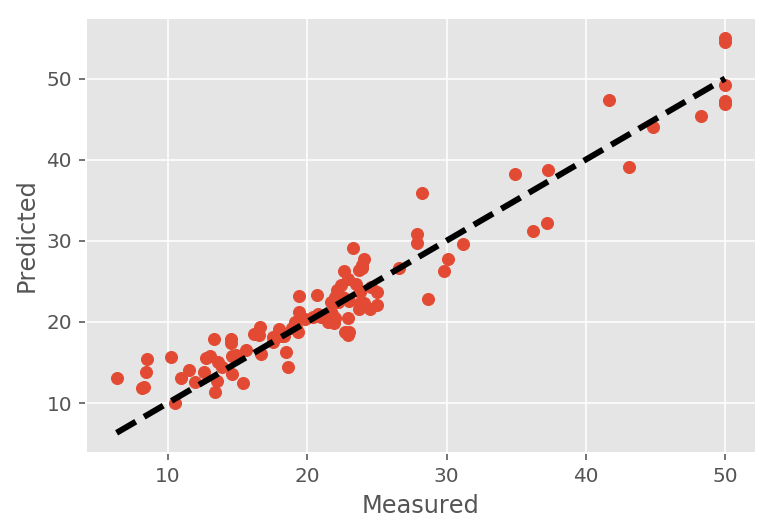

In [12]:
fig, ax = plt.subplots()
ax.scatter(Y_test, pred_y)
ax.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'k--', lw=3)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()

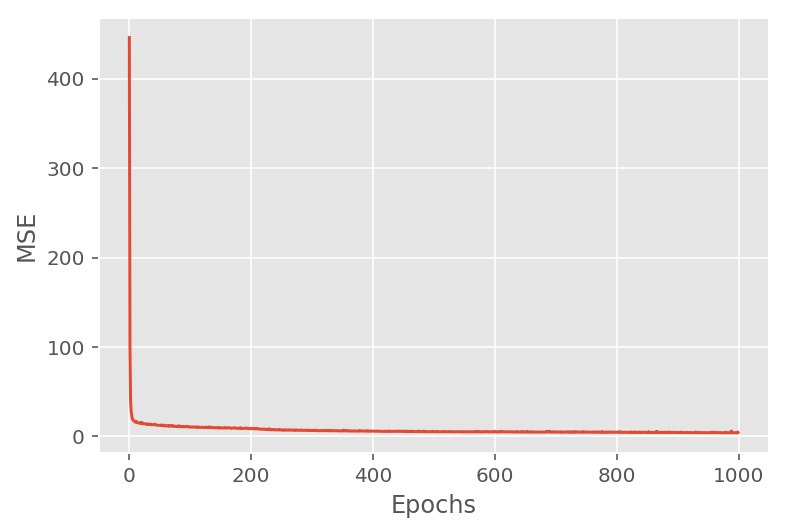

In [13]:
plt.plot(range(training_epochs)[:1000] , cost_history[:1000])
plt.xlabel('Epochs')
plt.ylabel('MSE')
plt.show()

In [14]:
cost_history[-1]

4.4437613